# Heart Attack/ Ataque no coração
Sugestão:
1. Análise Descritiva das Variáveis.
2. Análise de relação entre variáveis.
3. Visualização das análises.
4. Regressão logística.

Objetivo:
- Criar modelo de regressão logística para classificação de forma a maximizar o “Score F1” no conjunto de teste.

Entrega:
- Arquivo .csv com apenas uma coluna dos valores alvo estimados {0,1} . (com a mesma sequência do conj. que foi entregue



In [39]:
import pandas as pd # Importacao do pandas
import numpy as np # Importacao do numpy
import matplotlib.pyplot as plt # Importacao do matplotlib
import seaborn as sns # Importacao do sns

In [37]:
df = pd.read_csv('https://raw.githubusercontent.com/MaksonViini/Learning-Python/master/Bootcamp%20Neuron/Datasets/heart_train.csv')

In [33]:
df.describe() # exibindo dados estatísticos do dataset de treino

,Apparent Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars)
count,538.000000,538.000000,538.000000,538.000000,538.000000
mean,9.979895,0.775985,10.562797,9.503339,994.043513
std,10.385096,0.174406,6.767862,3.923508,156.779130
min,-21.716667,0.280000,0.000000,0.000000,0.000000
25%,1.141667,0.660000,5.276775,7.691775,1012.630000
50%,11.250000,0.830000,9.764650,9.982000,1017.380000
75%,17.323611,0.920000,13.930525,11.270000,1023.170000
max,33.316667,1.000000,39.316200,16.100000,1041.590000


In [28]:
df.shape

(8247, 6)

In [29]:
df.isnull().sum()

Temperature (C)             7249
Apparent Temperature (C)    7249
Humidity                    7249
Wind Speed (km/h)           7249
Visibility (km)             7249
Pressure (millibars)        7249
dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8247 entries, 0 to 8246
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Temperature (C)           998 non-null    float64
 1   Apparent Temperature (C)  998 non-null    float64
 2   Humidity                  998 non-null    float64
 3   Wind Speed (km/h)         998 non-null    float64
 4   Visibility (km)           998 non-null    float64
 5   Pressure (millibars)      998 non-null    float64
dtypes: float64(6)
memory usage: 386.7 KB


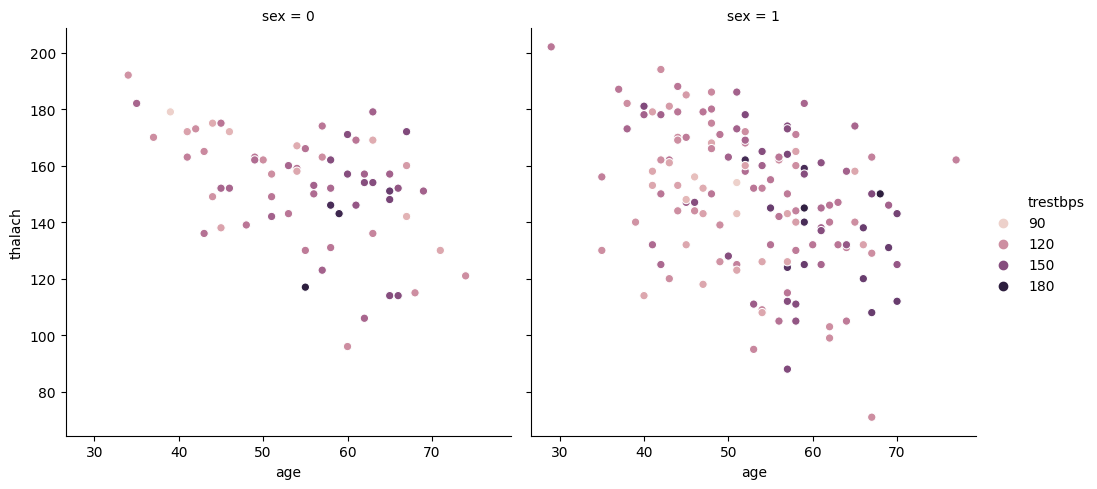

In [40]:
sns.relplot(x='age', y='thalach', col='sex', hue='trestbps', data=df) # Relacao idade, sexo com pressão arterial em repouso e frequência cardíaca máxima atingir

In [ ]:
sns.catplot(x='sex', kind='count', data=df)

In [ ]:
plt.style.use("ggplot")
plt.scatter(df['age'], df['target'])

In [ ]:
sns.barplot(x='target', y='age', data=df) # Relacao de idade com casos

In [ ]:
sns.barplot(x='sex', y='age', hue='target', data=df) # Contagem dos casos de acordo com sexo e idade

In [ ]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(df.corr(), annot=True, cmap="PiYG") # Correlacao dos dados

In [ ]:
sns.distplot(df['age']) # Distribuicao da idade

In [ ]:
size = df['sex'].value_counts()
labels = 'Male', 'Female'
plt.pie(size, labels=labels, autopct='%.2f%%') # Distribuicao pelo sexo

In [ ]:
sns.countplot(x='target', palette='pastel', data=df) # Contagem dos casos da coluna alvo

In [ ]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 7)
sns.boxplot(x='target', y='trestbps', data=df) # Relacao dos dados target com pressão arterial em repouso

In [ ]:
df.head()

# **Treinando modelo de Regressão Logística**

In [ ]:
# Carregando as bibliotecas
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, log_loss, confusion_matrix

In [ ]:
#Verificando se os dados estão desbalanceados
df["target"].value_counts()

In [ ]:
# De acordo com o heatmap irei montar um dataset com as features que mais se relacionam com o target
cols = ["cp","fbs","restecg","thalach","slope"]
df_reglog = df[cols]
df_reglog

In [ ]:
df_reglog.shape

In [ ]:
# Definindo meus dados de feature e target
X = df_reglog
y = df['target']

In [ ]:
# Dividindo meus dados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [ ]:
# Treinando com regressão logística
logreg = LogisticRegression(penalty='none', solver='newton-cg').fit(X_train, y_train)

In [ ]:
# Definindo escala no conjunto de treino
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)

In [ ]:
# Imprimindo o coeficiente de interceptação
print('Intercept: ' + str(logreg.intercept_[0]))

In [ ]:
# Imprimindo o coeficiente de regressão
logreg.coef_[0]

In [ ]:
# Prevendo a probabilidade
X_test=scaler.transform(X_test)

y_probab = logreg.predict_proba(X_test)

y_probab.shape

In [ ]:
# Analise de log_loss
log_loss(y_test,y_probab)

o Log Loss ficou com um valor alto, pois deve se aproximar do valor 1

## **Regularização dos dados**

In [ ]:
X = df_reglog
y = df['target']

In [ ]:
# Dividindo novamente meus dados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [ ]:
# Importando novas bibliotecas
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
# Escolhendo hiperparametro
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('logreg', LogisticRegression(penalty='l1',solver='liblinear'))])

parameters = {'logreg__C': np.linspace(10**-5,10,100)}
 
gcv=GridSearchCV(pipe, parameters, cv=3, scoring='neg_log_loss', n_jobs=-1)
gcv.fit(X_train, y_train)

#Vendo o melhor valor e o escore associado
c=gcv.best_params_['logreg__C']

c, gcv.best_score_

In [ ]:
# Treinando e gerando valores preditos
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('logreg', LogisticRegression(penalty='l1', C=c, solver='liblinear'))])
pipe.fit(X_train, y_train)

In [ ]:
pipe['logreg'].intercept_[0]

In [ ]:
pipe['logreg'].coef_[0]

In [ ]:
# Gerando valores preditos com os dados de teste
y_probab = pipe.predict_proba(X_test)
y_probab = y_probab[:,1]

In [ ]:
# Valor do erro no teste
log_loss(y_test,y_probab) # MARAVILHA !!!

In [ ]:
# Classificação das probabilidades em 0 ou 1
corte=.1

y_pred=1*(y_probab > corte)

In [ ]:
y_pred

Gerando a matriz de confusão para avaliação do modelo

In [ ]:
cf_matrix=confusion_matrix(y_test, y_pred)

In [ ]:
group_names = ['Verdadeiro Negativo (VN)','Falso Positivo (FP)','False Negativo (FN)','Verdadeiro Positivo (VP)']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greens')
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

In [ ]:
# Gerando o report
report=classification_report(y_test, y_pred)

print(report)

In [ ]:
y_pred

Gerando exportação dos dados

In [ ]:
df_total_exp =pd.DataFrame(y_pred, columns=['Target']) 

In [ ]:
from google.colab import files
df.to_csv('HeartAttack.csv') 
files.download('HeartAttack.csv')